# Gravity Tech Test - Modelling
***
**Author:** Mauricio Jacome  
**Date:** 31-Aug-2022  
**Objective**: Build Credit Scoring model from limited dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from optbinning import BinningProcess

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
df =pd.read_csv('loan_data.csv', header= 0, names=['credit_policy','purpose',
'int_rate',
'installment',
'log_annual_inc',
'dti',
'fico',
'days_with_cr_line',
'revol_bal',
'revol_util',
'inq_last_6mths',
'delinq_2yrs',
'pub_rec',
'not_fully_paid'])

print("Dimension of the dataset is:", df.shape)
df.head()  # Top 5 rows from dataframe

Dimension of the dataset is: (9578, 14)


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [33]:
variable_names = list(df.columns[0:-1])
categorical_variables= ['purpose']

In [34]:
X = df[variable_names].values
y = df.not_fully_paid



In [94]:
selection_criteria = {
    "iv": {"min": 0.025, "max": 0.8, "strategy": "highest", "top": 10}
}


In [95]:
binning_process = BinningProcess(variable_names,
                                 categorical_variables=categorical_variables,
                                 selection_criteria=selection_criteria)

In [96]:
clf1 = Pipeline(steps=[('binning_process', binning_process),
                      ('classifier', LogisticRegression())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('binning_process',
                 BinningProcess(binning_fit_params=None,
                                binning_transform_params=None,
                                categorical_variables=['purpose'],
                                fixed_variables=None, max_bin_size=None,
                                max_n_bins=None, max_n_prebins=20,
                                max_pvalue=None,
                                max_pvalue_policy='consecutive',
                                min_bin_size=None, min_n_bins=None,
                                min_prebin_size=0.05, n_jobs=None,
                                selection_cri...
                                                'days_with_cr_line',
                                                'revol_bal', 'revol_util',
                                                'inq_last_6mths', 'delinq_2yrs',
                                                'pub_rec'],
                                

In [97]:
y_pred = clf1.predict(X_train)
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.99      0.91      6434
           1       0.57      0.06      0.11      1228

    accuracy                           0.84      7662
   macro avg       0.71      0.53      0.51      7662
weighted avg       0.80      0.84      0.78      7662



In [98]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.36      0.03      0.06       305

    accuracy                           0.84      1916
   macro avg       0.60      0.51      0.49      1916
weighted avg       0.77      0.84      0.78      1916



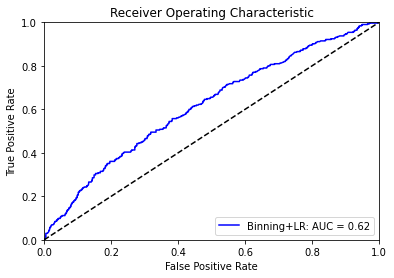

In [99]:
probs = clf1.predict_proba(X_test)
preds = probs[:,1]
fpr1, tpr1, threshold = roc_curve(y_test, preds)
roc_auc1 = auc(fpr1, tpr1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label='Binning+LR: AUC = {0:.2f}'.format(roc_auc1))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [100]:
binning_process.summary()

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
0,credit_policy,categorical,OPTIMAL,True,2,0.150825,0.0185714,0.166055,0.244845
1,purpose,categorical,OPTIMAL,True,5,0.0584226,0.00723474,0.118726,0.0787179
2,int_rate,categorical,OPTIMAL,True,13,0.593045,0.0669306,0.390343,0.00665209
3,installment,categorical,OPTIMAL,False,5,4.75521,0.42096,0.888909,5.37728e-31
4,log_annual_inc,categorical,OPTIMAL,False,10,1.36679,0.140595,0.536547,6.2213e-05
5,dti,categorical,OPTIMAL,False,8,5.07738,0.318898,0.772611,2.84081e-36
6,fico,categorical,OPTIMAL,True,12,0.208698,0.0253741,0.244751,5.2448e-05
7,days_with_cr_line,categorical,OPTIMAL,False,10,3.43852,0.252059,0.709392,1.77746e-16
8,revol_bal,categorical,OPTIMAL,False,2,5.7008,0.51148,0.908935,7.83743e-45
9,revol_util,categorical,OPTIMAL,False,12,1.53421,0.146281,0.549757,9.18621e-05


In [101]:
optb = binning_process.get_binned_variable("purpose")
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[major_purchase, credit_card]",1364,0.178021,1205,159,0.116569,0.369121,0.021338,0.002652
1,[debt_consolidation],3138,0.409554,2656,482,0.153601,0.0504228,0.001024,0.000128
2,[all_other],1913,0.249674,1601,312,0.163095,-0.0208291,0.000109,0.000014
3,[home_improvement],496,0.064735,407,89,0.179435,-0.136033,0.001254,0.000157
4,"[educational, small_business]",751,0.098016,565,186,0.247670,-0.545131,0.034698,0.004284
5,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000
Totals,,7662,1.000000,6434,1228,0.160271,,0.058423,0.007235


We have found an interesting configuration of explainable model. Logit + WoE with custom binning. the opportunities are endless for configuration, nonetheless the current configuration uses FICO score as an input into the model, we can compute a scorecard to be used with this model